In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/vimalkumar/Downloads/Rainfall_1901_2016.csv')
data

,Rainfall - (MM),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
...,...,...,...
1387,60.60610,2016,August
1388,13.76940,2016,September
1389,1.07552,2016,October
1390,2.88480,2016,November


In [3]:
data[' Year']

0       1901
1       1901
2       1901
3       1901
4       1901
        ... 
1387    2016
1388    2016
1389    2016
1390    2016
1391    2016
Name:  Year, Length: 1392, dtype: int64

In [4]:
data['date'] = data[' Year'].astype(str) + ' ' +  data['Month']
data

,Rainfall - (MM),Year,Month,date
0,40.42580,1901,January,1901 January
1,12.30220,1901,February,1901 February
2,25.51190,1901,March,1901 March
3,14.29420,1901,April,1901 April
4,38.30460,1901,May,1901 May
...,...,...,...,...
1387,60.60610,2016,August,2016 August
1388,13.76940,2016,September,2016 September
1389,1.07552,2016,October,2016 October
1390,2.88480,2016,November,2016 November


In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y %B')
data = data.drop([' Year','Month'],axis=1)
data = data.rename(columns={'Rainfall - (MM)':'rainfall'})
data

,rainfall,date
0,40.42580,1901-01-01
1,12.30220,1901-02-01
2,25.51190,1901-03-01
3,14.29420,1901-04-01
4,38.30460,1901-05-01
...,...,...
1387,60.60610,2016-08-01
1388,13.76940,2016-09-01
1389,1.07552,2016-10-01
1390,2.88480,2016-11-01


In [6]:
data.index = data['date']
data

,rainfall,date
date,,
1901-01-01,40.42580,1901-01-01
1901-02-01,12.30220,1901-02-01
1901-03-01,25.51190,1901-03-01
1901-04-01,14.29420,1901-04-01
1901-05-01,38.30460,1901-05-01
...,...,...
2016-08-01,60.60610,2016-08-01
2016-09-01,13.76940,2016-09-01
2016-10-01,1.07552,2016-10-01


In [7]:
data.shape

(1392, 2)

In [8]:
data.isna().sum()

rainfall    0
date        0
dtype: int64

In [9]:
data=data.drop('date',axis=1)
data

,rainfall
date,
1901-01-01,40.42580
1901-02-01,12.30220
1901-03-01,25.51190
1901-04-01,14.29420
1901-05-01,38.30460
...,...
2016-08-01,60.60610
2016-09-01,13.76940
2016-10-01,1.07552


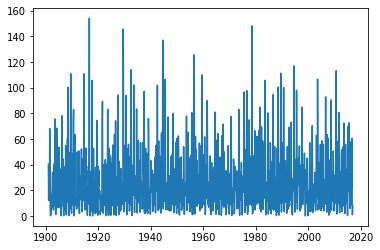

In [10]:
plt.plot(data['rainfall'])

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [13]:
adf_test(data['rainfall'])

1. ADF :  -6.695889008362778
2. P-Value :  4.000735413147937e-09
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1368
5. Critical Values :
	 1% :  -3.435139190725917
	 5% :  -2.8636550704859007
	 10% :  -2.5678960623995417


In [15]:
from pmdarima import auto_arima 
stepwise_fit= auto_arima(data['rainfall'],suppress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1392
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -6075.835
Date:                Thu, 09 Dec 2021   AIC                          12165.670
Time:                        15:33:38   BIC                          12202.340
Sample:                             0   HQIC                         12179.382
                               - 1392                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.1747      0.937     25.807      0.000      22.339      26.011
ar.L1          0.9985      0.002    405.031      0.000       0.994       1.003
ar.L2         -0.9969      0.002   -449.312      0.000      -1.001      -0.993
ma.L1         -0.7937      0.026    -30.883      0.000      -0.844      -0.743
ma.L2          0.7989      0.025     31.949      0.000       0.750       0.848
ma.L3          0.1808      0.025      7.225      0.000       0.132       0.230
sigma2       372.2173     10.794     34.484      0.000     351.062     393.373
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              2094.98
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.66
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
from statsmodels.tsa.arima.model import ARIMA 
model = ARIMA(data['rainfall'], order=(2,0,3))
model=model.fit()
model.summary()

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               rainfall   No. Observations:                 1392
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -6065.922
Date:                Thu, 09 Dec 2021   AIC                          12145.844
Time:                        15:34:19   BIC                          12182.513
Sample:                    01-01-1901   HQIC                         12159.556
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2144      0.824     30.612      0.000      23.600      26.829
ar.L1          1.0003      0.000   2202.877      0.000       0.999       1.001
ar.L2         -0.9999      0.000  -3328.111      0.000      -1.000      -0.999
ma.L1         -0.8083      0.038    -21.445      0.000      -0.882      -0.734
ma.L2          0.8013      0.058     13.922      0.000       0.688       0.914
ma.L3          0.1971      0.026      7.614      0.000       0.146       0.248
sigma2       349.2138     21.704     16.090      0.000     306.674     391.753
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              1906.55
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.60
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
print(data.shape)
train=data.iloc[:-50]
test=data.iloc[-50:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(1392, 1)
(1342, 1) (50, 1)


In [18]:
start=len(train)
print(start)
end=len(train)+len(test)-1
print(end)
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

1342
1391
2012-11-01     7.402847
2012-12-01    20.290619
2013-01-01    36.817836
2013-02-01    35.979718
2013-03-01    31.598450
2013-04-01    18.195923
2013-05-01    12.406721
2013-06-01    19.869669
2013-07-01    40.052301
2013-08-01    42.026249
2013-09-01    35.404852
2013-10-01     9.970152
2013-11-01     9.237742
2013-12-01    21.864444
2014-01-01    32.795809
2014-02-01    36.858355
2014-03-01    26.896425
2014-04-01    19.450718
2014-05-01    12.449434
2014-06-01    22.012544
2014-07-01    34.610405
2014-08-01    40.611539
2014-09-01    27.979440
2014-10-01    15.428463
2014-11-01     7.951250
2014-12-01    20.849130
2015-01-01    32.610756
2015-02-01    38.369332
2015-03-01    28.761295
2015-04-01    21.837647
2015-05-01    10.949618
2015-06-01    21.686242
2015-07-01    38.018582
2015-08-01    48.473855
2015-09-01    34.276322
2015-10-01    12.066387
2015-11-01     9.169938
2015-12-01    20.292410
2016-01-01    34.006986
2016-02-01    38.333270
2016-03-01    24.521212
2016-0

<AxesSubplot:xlabel='date'>

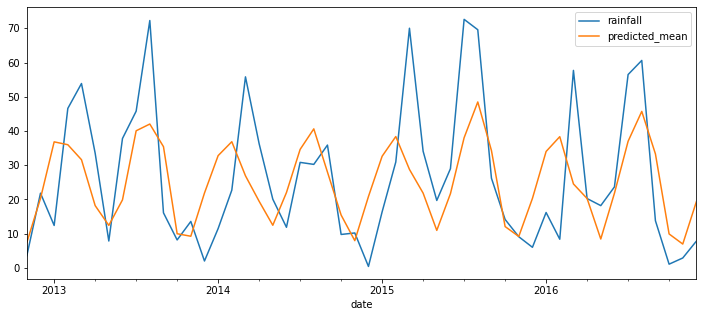

In [19]:
test['rainfall'].plot(figsize=(12,5),legend=True)
pred.plot(figsize=(12,5),legend='ARIMA Predictions')

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['rainfall']))
print(rmse)

16.705665101665037


In [21]:
data.tail()

,rainfall
date,
2016-08-01,60.60610
2016-09-01,13.76940
2016-10-01,1.07552
2016-11-01,2.88480
2016-12-01,7.82298


In [29]:
index_future_dates=pd.date_range(start='2017-01-01',periods=51,freq='MS')

fut_pred=model.predict(start=len(data),end=len(data)+50,typ='levels')
fut_pred.index=index_future_dates
print(type(fut_pred))
print(fut_pred)

<class 'pandas.core.series.Series'>
2017-01-01    34.490313
2017-02-01    41.824010
2017-03-01    30.276569
2017-04-01    13.670463
2017-05-01     8.605964
2017-06-01    20.144067
2017-07-01    36.748993
2017-08-01    41.821647
2017-09-01    30.292882
2017-10-01    13.689143
2017-11-01     8.608339
2017-12-01    20.127765
2018-01-01    36.730313
2018-02-01    41.819261
2018-03-01    30.309174
2018-04-01    13.707824
2018-05-01     8.610736
2018-06-01    20.111483
2018-07-01    36.711630
2018-08-01    41.816854
2018-09-01    30.325446
2018-10-01    13.726507
2018-11-01     8.613154
2018-12-01    20.095221
2019-01-01    36.692946
2019-02-01    41.814425
2019-03-01    30.341698
2019-04-01    13.745192
2019-05-01     8.615594
2019-06-01    20.078980
2019-07-01    36.674260
2019-08-01    41.811974
2019-09-01    30.357929
2019-10-01    13.763879
2019-11-01     8.618056
2019-12-01    20.062758
2020-01-01    36.655573
2020-02-01    41.809501
2020-03-01    30.374141
2020-04-01    13.782567
2020

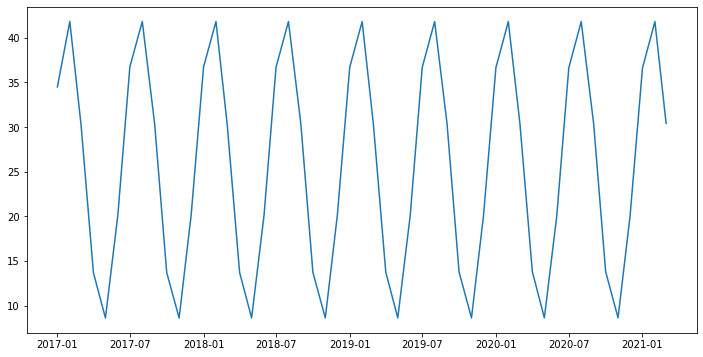

In [30]:
plt.figure(figsize=(12,6))
plt.plot(fut_pred)


In [31]:
fut_df = pd.DataFrame(fut_pred)
fut_df = fut_df.rename(columns={'predicted_mean':'rainfall'})
fut_df

,rainfall
2017-01-01,34.490313
2017-02-01,41.824010
2017-03-01,30.276569
2017-04-01,13.670463
2017-05-01,8.605964
2017-06-01,20.144067
2017-07-01,36.748993
2017-08-01,41.821647
2017-09-01,30.292882
2017-10-01,13.689143


In [32]:
com = pd.concat([test,fut_df])
com

,rainfall
2012-11-01,3.560230
2012-12-01,21.818600
2013-01-01,12.389600
2013-02-01,46.590900
2013-03-01,53.863600
...,...
2020-11-01,8.623044
2020-12-01,20.030376
2021-01-01,36.618194
2021-02-01,41.804490


In [33]:
test.shape[0]+fut_pred.shape[0]

101

In [36]:
test.tail()

,rainfall
date,
2016-08-01,60.60610
2016-09-01,13.76940
2016-10-01,1.07552
2016-11-01,2.88480
2016-12-01,7.82298


In [38]:
fut_pred.head(15)

2017-01-01    34.490313
2017-02-01    41.824010
2017-03-01    30.276569
2017-04-01    13.670463
2017-05-01     8.605964
2017-06-01    20.144067
2017-07-01    36.748993
2017-08-01    41.821647
2017-09-01    30.292882
2017-10-01    13.689143
2017-11-01     8.608339
2017-12-01    20.127765
2018-01-01    36.730313
2018-02-01    41.819261
2018-03-01    30.309174
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:>

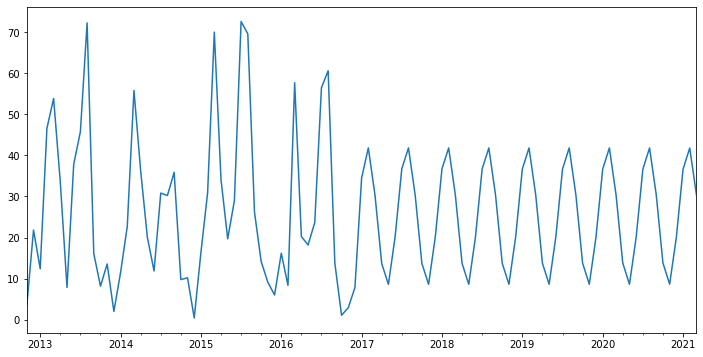

In [34]:
com['rainfall'].plot(figsize=(12,6))